In [1]:
# Dimensionality Reduction and Feature Selection Assignment
# DSC 550
# Week 7
# Data Mining Assignment Week 7
# David Berberena
# 4/28/2024

# Program Start

## Part 1: PCA and Variance Threshold in a Linear Regression

## 1. Import the housing data as a data frame and ensure that the data is loaded properly.

In [2]:
# Importing the Pandas and NumPy libraries for numerical computation and data manipulation are necessary here.

import pandas as pd
import numpy as np

# Reading in the house prices training dataset as a dataframe and displaying the first few rows to verify proper reading is
# done below with read_csv() and head().

house = pd.read_csv('housing_train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Drop the "Id" column and any features that are missing more than 40% of their values.

In [3]:
# To drop the ID column, we can accomplish this by using the drop() function and specifying the column using the columns 
# and inplace arguments. 

house.drop(columns = ['Id'], inplace = True)

# To drop the features with more than 40% of the values missing, drop() is needed here too, yet the features need to be 
# identified with the is.null() function and segmenting those that have more than 40% of values missing (NaN) to be dropped.

nan_value_features = house.isnull().mean()

unneeded_features = nan_value_features[nan_value_features > 0.4].index

house.drop(columns = unneeded_features, inplace = True)

# The head() function is used to verify the changes made to the dataset. I have its argument to 30 to visualize the 
# transformation's effect on several instances within the first few observations.

house.head(30)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


## 3. For numerical columns, fill in any missing data with the median value.

In [4]:
# To find the columns that are to be considered numerical, I need to specifically tell Python to identify these columns by 
# their type, and any of them that are considered integers (int64) or float values (float64) are to be filled in with those 
# columns' median values. I looked up how to specifically call the columns by their type and found that Pandas has the 
# select_dtypes() function that can select the columns needed by using its include argument to name the types that need to 
# be chosen. 

numerical_columns = house.select_dtypes(include = ['int64', 'float64']).columns

# Now that the numerical columns have been established, I am using NumPy's median() function along with the fillna() 
# function to fill in the missing values within those columns with their respective median values.

house[numerical_columns] = house[numerical_columns].fillna(house[numerical_columns].median())

# The head() function is used to verify the changes made to the dataset.

house.head(30)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


## 4. For categorical columns, fill in any missing data with the most common value (mode).

In [5]:
# This can be accomplished with the same code employed for the last task, yet differentiated slightly to replace the 
# numerical column typed with the 'object' type, denoting a categorical column. The median() function also needs to be 
# switched to the mode() function. 

categorical_columns = house.select_dtypes(include = ['object']).columns

house[categorical_columns] = house[categorical_columns].fillna(house[categorical_columns].mode())

# The head() function is used to verify the changes made to the dataset.

house.head(30)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


## 5. Convert the categorical columns to dummy variables.

In [6]:
# Converting the categorical variables into dummy variables requires the categorical columns variable we created in the 
# last step and placing it into the columns argument of the Pandas function get_dummies().

house = pd.get_dummies(house, columns = categorical_columns)

# The head() function is used to verify the changes made to the dataset.

house.head(30)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,False,False,False,True,False,False,False,False,True,False
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,False,False,False,True,False,False,False,False,True,False
7,60,69.0,10382,7,6,1973,1973,240.0,859,32,...,False,False,False,True,False,False,False,False,True,False
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,False,False,False,True,True,False,False,False,False,False
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,False,False,False,True,False,False,False,False,True,False


## 6. Split the data into a training and test set, where the SalePrice column is the target.

In [7]:
# Splitting a dataset into training and test sets in Python calls for the importation of the train_test_split() function 
# from Sci-kitlearn's model_selection module.

from sklearn.model_selection import train_test_split

# As SalePrice has been specified as the target variable, this column needs to be extracted as the dependent y variable 
# the remaining dataset is considered the independent x variable data. Then the train_test_split() will be used to split 
# both the x and y house data into the training and test sets using the standard 80/20 ratio. The random_state argument is 
# set for reproducibility of the code output.

house_x = house.drop(columns = ['SalePrice'])
house_y = house['SalePrice']


house_xtrain, house_xtest, house_ytrain, house_ytest = train_test_split(house_x, house_y, test_size = 0.2, 
                                                                        random_state = 123)

# The shape() function is used to verify the correct splitting of the datasets.

print('Size of x variable training dataset:', house_xtrain.shape)
print('Size of x variable test dataset:',house_xtest.shape)
print('Size of y variable training dataset:',house_ytrain.shape)
print('Size of y variable test dataset:',house_ytest.shape)

Size of x variable training dataset: (1168, 266)
Size of x variable test dataset: (292, 266)
Size of y variable training dataset: (1168,)
Size of y variable test dataset: (292,)


## 7. Run a linear regression and report the R2-value and RMSE on the test set.

In [8]:
# For linear regression, Sci-kitlearn's linear_model module has a LinearRegression() function that needs to be imported. 
# The metrics module in the same library has the r2_score() and mean_squared_error() functions required for the metrics the 
# current task is asking us to report. 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# The LinearRegression() function is stored in a variable to fit onto the training data previously defined.

house_linear_model = LinearRegression()

house_linear_model.fit(house_xtrain, house_ytrain)

# The test predictions can be generated by using the predict() function from the linear regression model on the test set.

house_ypredictions = house_linear_model.predict(house_xtest)

# For both the R-Squared value and the RMSE metric, we simply employ the imported r2_score() and mean_squared_error() 
# functions using the predictions and the SalePrice test set as arguments. To attain the RMSE, after using the 
# mean_squared_error() function, that answer must be subjected to the sqrt() function from NumPy to get the square root of 
# MSE value.

house_rsquared = r2_score(house_ytest, house_ypredictions)

house_rmse = np.sqrt(mean_squared_error(house_ytest, house_ypredictions))

print('House linear regression model R-Squared value:', house_rsquared)
print('House linear regression model RMSE value:', house_rmse)

House linear regression model R-Squared value: 0.895533515653227
House linear regression model RMSE value: 25407.92498636698


## 8. Fit and transform the training features with a PCA so that 90% of the variance is retained.

In [9]:
# The instructions say that the pertinent information to solve this task would be found in Section 9.1, so that's where I 
# pulled my startup code from. I have to import the PCA() function from Sci-kitlearn's decomposition module along with the 
# preprocessing module's StandardScaler() function.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

house_train_features = StandardScaler().fit_transform(house_xtrain)

# The PCA function (created with 0.9 as the argument for number of components to denote the 90% variance) has been stored 
# in a variable to use on the training set.

house_pca = PCA(n_components = 0.9)

# Fitting and transforming the training set with the PCA function is now done with the fit_transform() function within the 
# PCA variable. 

house_xtrain_pca = house_pca.fit_transform(house_train_features)

# To show that the PCA function has worked on the training set, I will use the shape() function.

print('Dimensions of the House PCA training set with a 90% variance retention:', house_xtrain_pca.shape)

Dimensions of the House PCA training set with a 90% variance retention: (1168, 137)


## 9. How many features are in the PCA-transformed matrix?

In [10]:
# To see the number of features within the PCA matrix, we can simply call the second index of the shape of the newly made 
# matrix. I will compare this number of features with the original number of features in the training set prior to PCA.

print('Number of features within the house training set before PCA:', house_train_features.shape[1])
print('Number of features within the house training set after PCA:', house_xtrain_pca.shape[1])

Number of features within the house training set before PCA: 266
Number of features within the house training set after PCA: 137


## 10. Transform but DO NOT fit the test features with the same PCA.

In [11]:
# This can be done in the same way as fitting and transforming the training set, except for simply substituting the correct 
# test set and not using the fit_transform() function only use the transform() function.

house_test_features = StandardScaler().fit_transform(house_xtest)

house_xtest_pca = house_pca.transform(house_test_features)

# The base shape() function is used to show the transformation of the test features only and not the fitting of them.

print('Shape of the house test set before PCA:', house_test_features.shape)
print('Shape of the house test set after PCA:', house_xtest_pca.shape)

Shape of the house test set before PCA: (292, 266)
Shape of the house test set after PCA: (292, 137)


## 11. Repeat step 7 with your PCA transformed data.

In [12]:
# All that needs to be done here is to craft a linear regression model with the PCA transformed training and test data to 
# report the R-Squared and RMSE values.

house_pca_model = LinearRegression()

house_pca_model.fit(house_xtrain_pca, house_ytrain)

# The test predictions are generated by using the predict() function from the linear regression model on the PCA test set.

house_pca_ypredictions = house_pca_model.predict(house_xtest_pca)

# For both the R-Squared value and the RMSE metric, we simply employ the imported r2_score() and mean_squared_error() 
# functions using the predictions and the SalePrice test set as arguments. To attain the RMSE, after using the 
# mean_squared_error() function, that answer must be subjected to the sqrt() function from NumPy to get the square root of 
# MSE value.

house_pca_rsquared = r2_score(house_ytest, house_pca_ypredictions)

house_pca_rmse = np.sqrt(mean_squared_error(house_ytest, house_pca_ypredictions))

print('House PCA linear regression model R-Squared value:', house_pca_rsquared)
print('House PCA linear regression model RMSE value:', house_pca_rmse)

House PCA linear regression model R-Squared value: 0.8829669890569934
House PCA linear regression model RMSE value: 26892.730396483235


## 12. Take your original training features (from step 6) and apply a min-max scaler to them.

In [13]:
# I had to go all the way back to Chapter 4 of the textbook to find the necessary information to solve this task. The 
# MinMaxScaler() function also resides in the preprocessing module of Sci-kitlearn, so I will import that here and use it 
# on the original training features that were created by the initial train_test_split() function.

from sklearn.preprocessing import MinMaxScaler

# Like other module functions, the MinMaxScaler() function is stored in a callable variable.

house_scaler = MinMaxScaler()

house_xtrain_scaled = house_scaler.fit_transform(house_xtrain)

# Now the only way to see whether the min-max scaler worked on the original features is to perform the PCA on the scaled 
# features and compare the number of features from the original PCA features to the scaled PCA features.

house_xtrain_scaled_pca = house_pca.fit_transform(house_xtrain_scaled)

print('Number of features within the original feature PCA training set:', house_xtrain_pca.shape[1])
print('Number of features within the scaled feature PCA training set:', house_xtrain_scaled_pca.shape[1])

Number of features within the original feature PCA training set: 137
Number of features within the scaled feature PCA training set: 70


## 13. Find the min-max scaled features in your training set that have a variance above 0.1.

In [14]:
# The instructions say that the pertinent information to solve this task would be found in Section 10.1, so that's where I 
# pulled my startup code from. I have to import the VarianceThreshold() function from Sci-kitlearn's feature_selection 
# module.

from sklearn.feature_selection import VarianceThreshold

# This function works very much like the StandardScaler() function, so it is written as such with the threshold parameter 
# set to 0.1 as the task suggests. 

house_selector = VarianceThreshold(threshold=0.1)

# The selector variable is now applied to the scaled training features and the indices of those features with variance 
# above the 0.1 threshold are captured using the get_support() function and called by column name. 

house_selector.fit(house_xtrain_scaled)

features_above_variance_level = house_selector.get_support(indices=True)

high_variance_feature_names = house_xtrain.columns[features_above_variance_level]

# I am printing both the length of the features and the feature names as I am unclear as to the meaning of the ambiguous 
# statement of "find the min-max scaled features", as both can be considered "finding" them.

print('Number of min-max scaled house training features with a variance above 0.1:', len(high_variance_feature_names))
print('\nNames of min-max scaled house training features with a variance above 0.1:', high_variance_feature_names)

Number of min-max scaled house training features with a variance above 0.1: 48

Names of min-max scaled house training features with a variance above 0.1: Index(['YearRemodAdd', 'YrSold', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1',
       'LotShape_Reg', 'LotConfig_Corner', 'LotConfig_Inside',
       'Neighborhood_NAmes', 'Condition1_Norm', 'BldgType_1Fam',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard',
       'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Av',
       'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'BsmtFinType2_Unf', 'HeatingQC_Ex', 'HeatingQC_Gd',
       'HeatingQC_TA', 'KitchenQual_Gd', 'KitchenQu

## 14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [15]:
# I have written this code mainly by using step 12 as my guide by using the min-max scaler variable only to transforn the 
# original test features and then using the PCA variable only to transform the scaled test features.

house_xtest_scaled = house_scaler.transform(house_xtest)

house_xtest_scaled_pca = house_pca.transform(house_xtest_scaled)

# The shape of the features are displayed to show the difference between the scaled original test features and the scaled 
# PCA test features.

print('Number of features within the original feature scaled test set:', house_xtest_scaled.shape[1])
print('Number of features within the PCA feature scaled test set:', house_xtest_scaled_pca.shape[1])

Number of features within the original feature scaled test set: 266
Number of features within the PCA feature scaled test set: 70


## 15. Repeat step 7 with the high variance data.

In [16]:
# Crafting a linear regression model and reporting the R-Squared and RMSE values are only differentiated here by the high 
# variance data being used, and all other code remains the same as it was when first coded.

house_hv_model = LinearRegression()

house_hv_model.fit(house_xtrain_scaled[:, features_above_variance_level], house_ytrain)

# The test predictions are generated by using the predict() function from the linear regression model on the high variance 
# test set.

house_hv_ypredictions = house_hv_model.predict(house_xtest_scaled[:, features_above_variance_level])

# For both the R-Squared value and the RMSE metric, we simply employ the imported r2_score() and mean_squared_error() 
# functions using the predictions and the SalePrice test set as arguments. To attain the RMSE, after using the 
# mean_squared_error() function, that answer must be subjected to the sqrt() function from NumPy to get the square root of 
# MSE value.

house_hv_rsquared = r2_score(house_ytest, house_hv_ypredictions)

house_hv_rmse = np.sqrt(mean_squared_error(house_ytest, house_hv_ypredictions))

print('House high variance linear regression model R-Squared value:', house_hv_rsquared)
print('House high variance linear regression model RMSE value:', house_hv_rmse)

House high variance linear regression model R-Squared value: 0.676363372146209
House high variance linear regression model RMSE value: 44720.79779276361


## 16. Summarize your findings.

Looking at the R-Squared and RMSE statistics between the three occasions these metrics were calculated showcased the 
power of dimensionality reduction that PCA has without severely affecting the predictive power of the linear regression models. While the PCA transformed data did reduce the number of features to include only the most relevant to the essence of the dataset, the statistical measurements were almost the same values as before PCA worked on the data. With the high variance data however, there was a notable drop in predictive power when looking at both values. The closer the R-Squared value is to 1, the more accurate the model tends to predict observations correctly, and with the high variance data, that number fell from a high 0.8 to a high 0.6. RMSE shows more predictive power the closer to zero the value is, and while the number was far from zero in both the original and PCA data, the high variance data had that metric climb by more than 50%, indicating a poor predictive model. 

## Part 2: Categorical Feature Selection

## 1. Import the data as a data frame and ensure it is loaded correctly.

In [17]:
# Importing the data with read_csv() and showcasing its contents with the head() function ensures its proper loading.

mushroom = pd.read_csv('mushrooms.csv')

mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 2. Convert the categorical features (all of them) to dummy variables.

In [18]:
# I have reused code from the first part of the assignment (#4 and #5) to accomplish the dummy variable creation here.

categorical_features = mushroom.select_dtypes(include = ['object']).columns

mushrooms = pd.get_dummies(mushroom, columns = categorical_features)

mushrooms.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


## 3. Split the data into a training and test set.

In [19]:
# Accompanying code has been used from #6 of part 1 of the assignment. The columns that are to be dropped as the target 
# variables are the class_e and class_p variables, which dictate whether the mushroom is edible or poisonous.

mushroom_x = mushrooms.drop(columns = ['class_e', 'class_p'])
mushroom_y = mushrooms['class_e']

shroom_xtrain, shroom_xtest, shroom_ytrain, shroom_ytest = train_test_split(mushroom_x, mushroom_y, test_size = 0.2, 
                                                                            random_state = 123)

print('Size of mushroom x training dataset:', shroom_xtrain.shape)
print('Size of mushroom x test dataset:',shroom_xtest.shape)
print('Size of mushroom y training dataset:', shroom_ytrain.shape)
print('Size of mushroom y test dataset:',shroom_ytest.shape)

Size of mushroom x training dataset: (6499, 117)
Size of mushroom x test dataset: (1625, 117)
Size of mushroom y training dataset: (6499,)
Size of mushroom y test dataset: (1625,)


## 4. Fit a decision tree classifier on the training set.

In [20]:
# Reading Chapter 14 helped me to find the information I needed on the code for decision tree classifiers. I will be 
# importing the DecisionTreeClassifier() function in from Sci-kitlearn's tree module.

from sklearn.tree import DecisionTreeClassifier

# The DecisionTreeClassifier() function can be created in the same way that the LinearRegression() function is.

shroom_tree = DecisionTreeClassifier()

shroom_tree.fit(shroom_xtrain, shroom_ytrain)

DecisionTreeClassifier()

## 5. Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [21]:
# I have already calculated these metrics in a previous assignment concerning a K-Nearest Neighbors Classifier, so the same 
# code and functions can be used for the decision tree classifier here. The accuracy_score() and confusion_matrix() 
# functions from the metrics module in Sci-kitlearn are needed and will be imported.

from sklearn.metrics import accuracy_score, confusion_matrix

# Predictions can be made with the predict() function and the test set.

shroom_tree_predictions = shroom_tree.predict(shroom_xtest)

shroom_accuracy = accuracy_score(shroom_ytest, shroom_tree_predictions)

shroom_matrix = confusion_matrix(shroom_ytest, shroom_tree_predictions)

print('The decision tree classifier accuracy score is:', shroom_accuracy)
print('The decision tree confusion matrix is:', shroom_matrix)

The decision tree classifier accuracy score is: 1.0
The decision tree confusion matrix is: [[762   0]
 [  0 863]]


## 6. Create a visualization of the decision tree.

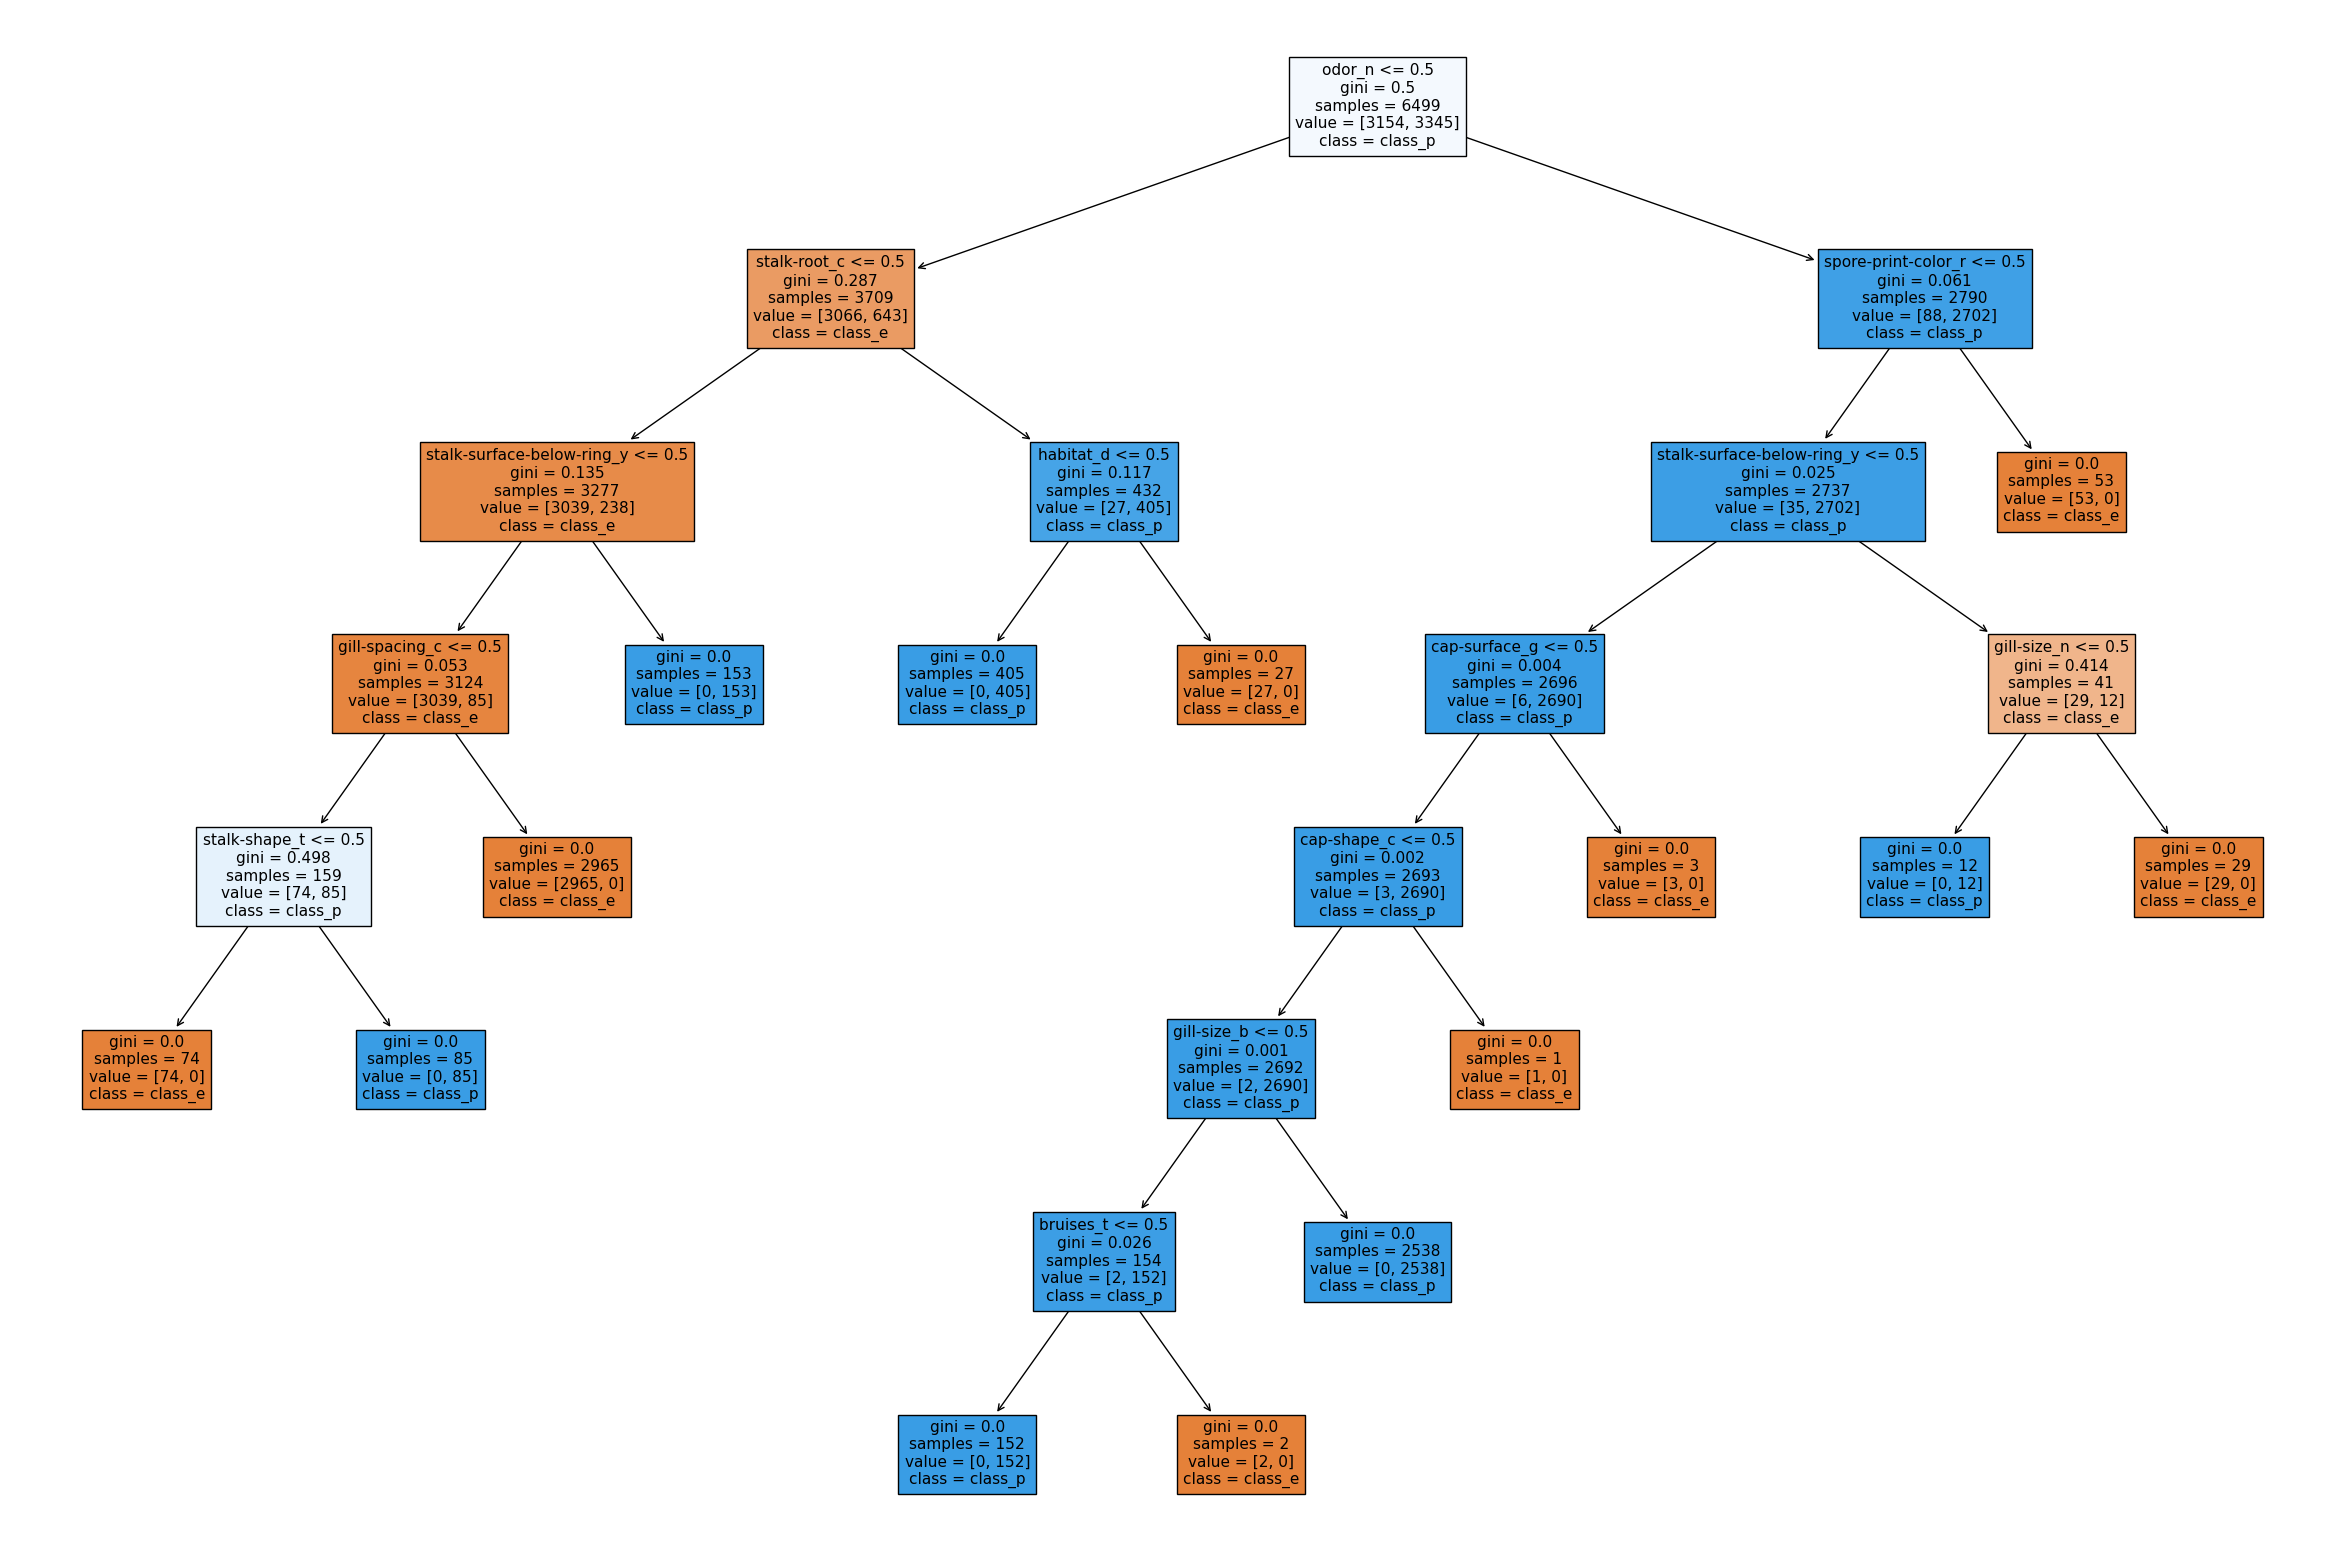

In [22]:
# For this task, my textbook (brand new) was actually missing the five pages that the information on this topic was located 
# on, so I looked online to find out how to locate the pages I was missing. Along the way, I researched an even easier way 
# to visualize a decision tree that I will be employing over the answer I finally found in Section 14.3. In addition to 
# Matplotlib for graphing purposes, I will be importing the plot_tree() function from Sci-kitlearn's tree module, which is 
# ready to plot decision trees.

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# To use the dataset columns in the visualization, I needed to convert the column names from indices to a list. Once that 
# was done, I made the output bigger and colored in so it could be seen much easier.

plt.figure(figsize=(30,20))
plot_tree(shroom_tree, filled = True, feature_names = shroom_xtrain.columns.tolist(), class_names = ['class_e', 'class_p'])
plt.show()

## 7. Use a χ2-statistic selector to pick the five best features for this data.

In [27]:
# The instructions say that the pertinent information to solve this task would be found in Section 10.4, so that's where I 
# pulled my startup code from. I will import the SelectKBest() and chi2() functions from Sci-kitlearn's feature_selection 
# module.

from sklearn.feature_selection import SelectKBest, chi2

# To make things as easy as can be for this not to get too muddled, I made sure to preserve the original dataset as the 
# mushroom variable while all other transformations were being performed on the mushrooms dataset. It is easiest to use the 
# base dataset that has not been transformed at all so I can get dummy variables again and use the unaltered first dummy 
# variable dataset to use the X^2 statistic selector.

input_mush_features = mushroom.drop(columns=['class'])
output_mush_features = mushroom['class']

mush_in = pd.get_dummies(input_mush_features)
mush_out = pd.get_dummies(output_mush_features)

# This block of code is almost identical to #13 in part 1's exercise with the min_max scaler, as they employ many of the 
# same functions. The SelectKBest() function uses the chi2 function as a metric to test the k number of features (in our 
# case 5) and the selector variable will then be fit onto the feature data.

important_feat_chooser = SelectKBest(score_func = chi2, k = 5)

important_feat_chooser.fit(mush_in, mush_out)

SelectKBest(k=5, score_func=<function chi2 at 0x00000255B47CDF80>)

## 8. Which five features were selected in step 7? Hint: Use the get_support function.

In [29]:
# This code is almost verbatim of the last half of Part 1 #13 with the data subbed out.

mush_feature_index = important_feat_chooser.get_support(indices=True)

mush_best_feature_names = mush_in.columns[mush_feature_index]

print('The names of the five best features to classify mushrooms as edible or poisonous are:', mush_best_feature_names)

The names of the five best features to classify mushrooms as edible or poisonous are: Index(['odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')


## 9. Repeat steps 4 and 5 with the five best features selected in step 7.

In [31]:
# Step 4 was to craft the decision tree classifier on the training dataset. This will now be done with the feature variable 
# I created in the last cell block of code.

best_shroom_tree = DecisionTreeClassifier()

best_shroom_feat_train = shroom_xtrain[['odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k']]

best_shroom_feat_test = shroom_xtest[['odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k']]

best_shroom_tree.fit(best_shroom_feat_train, shroom_ytrain)

DecisionTreeClassifier()

In [32]:
# Step 5 was to report the accuracy and create a confusion matrix for the model prediction on the test set. The same 
# metrics will be found here with the new decision tree.

# Predictions can be made with the predict() function and the test set.

best_shroom_tree_predictions = best_shroom_tree.predict(best_shroom_feat_test)

best_shroom_accuracy = accuracy_score(shroom_ytest, best_shroom_tree_predictions)

best_shroom_matrix = confusion_matrix(shroom_ytest, best_shroom_tree_predictions)

print('The best feature decision tree classifier accuracy score is:', best_shroom_accuracy)
print('The best feature decision tree confusion matrix is:', best_shroom_matrix)

The best feature decision tree classifier accuracy score is: 0.9273846153846154
The best feature decision tree confusion matrix is: [[644 118]
 [  0 863]]


## 10. Summarize your findings.

Seeing categorical feature selection at work through these metrics and reduction of dimensions within the dataset helps to see which features were the most important to maintaining the metrics. While dwindling down the features from over one hundred features to a mere does significantly increase a user's ability to handle the data, it also has shown that a loss of accuracy is very minimal. In all fairness, this should be a celebration of machine learning's ability to automate tasks like these that are cumbersome and require a lot of effort to store in a data warehouse. Yet looking at the nature of the dataset, I am hesitant to say that the tradeoff is worth it here. Looking at the final accuracy metric in relation to the first along with each confusion matrix, I would have to say that it is quite dangerous that the reduced feature decision tree managed to incorrectly classify 118 mushrooms as edible when indeed they are poisonous. People could lose their lives because we data scientists want to take shortcuts, and the well-being of humans is not something we should be playing with. That loss of eight percent means something here. If the data were harmless, then feature selection could be vied for, but when it involves personal matters like people potentially eating the mushrooms that the tree has classified as edible, I think it is safest and most ethical to take the extra time and energy to sift through all the data. This definitely has shown that being involved with so much data can lead to unexpectedly difficult choices. The decision tree classifier was 100% accurate when analyzing all of the features, something that cannot be overstated as being a success for a classifier model. For this dataset, I think feature selection is not needed. Maybe when classifying something like book titles and matching them to genres, this principle would be more ethically applicable.